# Lending Club Case Study

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import gc
gc.collect()

20

In [3]:
# Read the loan dataset
loan = pd.read_csv("C://Users//DELL//Desktop//Lending Assignment//loan.csv")

In [4]:
# View the number of rows and columns in original data set 
loan.shape

(39717, 111)

In [5]:
# Print first 5 rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### Dropping columns which have all the 100%missing values in respective columns

In [7]:
loan.dropna(axis=1, how='all', inplace=True)

#### As next_pymnt_d has highest misssing data and also since it doesnt seem to be a good predictor dropping it

In [8]:
loan.drop(['next_pymnt_d'], axis = 1, inplace=True)

In [9]:
#### As mths_since_last_record has next highest misssing data, visualising it w.r.t target variable if it is good predictor

<AxesSubplot:xlabel='mths_since_last_record', ylabel='loan_status'>

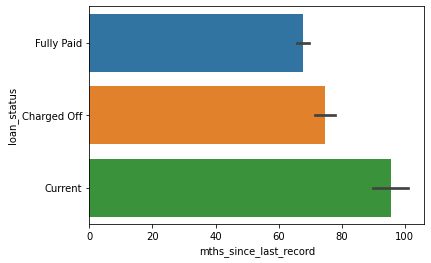

In [10]:
sns.barplot(x=loan['mths_since_last_record'],y=loan['loan_status'])

In [11]:
loan['mths_since_last_record']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: mths_since_last_record, Length: 39717, dtype: float64

In [12]:
loan['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

#### Filtering target variable loan_status. Since we need to predict whether loan applicant will likely to be Default/Non-Default. Removing the unwanted current type as it is ongoing 

In [13]:
currentstats = loan[(loan['loan_status'] =='Current')].index

In [14]:
currentstats.dtype

dtype('int64')

In [15]:
loan.drop(currentstats,inplace= True)

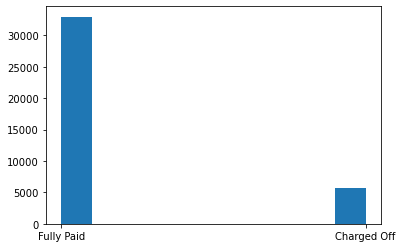

In [16]:
plt.hist(loan['loan_status'])
plt.show()

In [17]:
loan['loan_status'] = pd.factorize(loan['loan_status'])[0]

In [18]:
#loan['loan_status'].head()

In [19]:
#loan['loan_status'].describe()

#### Dropping mths_since_last_record as it doesn't seem to be a critical predictor

In [20]:
loan.drop(['mths_since_last_record'], axis = 1, inplace=True)

In [21]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                     int64
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [22]:
loan.duplicated().sum()

0

#### Dropping mths_since_last_delinq as it relates to customer behaviour variable and doesn't seem to be a critical predictor

In [23]:
loan.drop(['mths_since_last_delinq'], axis = 1, inplace=True)

In [24]:
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.68
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.47
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#### Dropping desc column as it is related to comments provided by borrower and doesn't seem to be a valid predictor

In [25]:
loan.drop(['desc'], axis = 1, inplace=True)

#### Dropping emp_title as it doesn't qualify as a good predictor

In [26]:
loan.drop(['emp_title'], axis = 1, inplace=True)

In [27]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

#### Filtering notnull values from emp_length

In [28]:
loan=loan[loan['emp_length'].notnull()]

In [29]:
loan['emp_length'] = loan['emp_length'].astype(str).str.strip('<+ years')

In [30]:
loan['emp_length'] = loan['emp_length'].astype(int)

#### Filtering notnull values from pub_rec_bankruptcies

In [31]:
loan['emp_length'] = loan['emp_length'].astype(int)

In [32]:
loan=loan[loan['pub_rec_bankruptcies'].notnull()]

#### Since we have very less percentage of null values, Filtering notnull values from last_pymnt_d, revol_util,title,collections_12_mths_ex_med,last_credit_pull_d

In [33]:
loan=loan[loan['last_pymnt_d'].notnull()]

In [34]:
loan=loan[loan['revol_util'].notnull()]

In [35]:
loan=loan[loan['title'].notnull()]

In [36]:
loan=loan[loan['collections_12_mths_ex_med'].notnull()]

In [37]:
loan=loan[loan['last_credit_pull_d'].notnull()]

#### Eliminating Customer behaviour variables revol_bal, revol_util, earliest_cr_line, delinq_2yrs

In [38]:
loan.drop(['revol_bal','revol_util','earliest_cr_line','delinq_2yrs'], axis = 1, inplace=True)

#### Removing id, member_id, url column can be removed as they have unique values for the purpose of loan identification only
#### zipcode column can be removed as it has only first three digits and that information can be obtained by the state colum
#### title column can be removed because it is redundant with purpose column which has fewer categories

In [39]:
loan.drop(['id','member_id','zip_code','title','url'], axis = 1, inplace=True)

#### Application type has only one type of value that is individual and also it is not useful for our analysis so dropping it

In [40]:
loan.drop(['application_type'],axis = 1, inplace=True)

In [41]:
loan.drop(['delinq_amnt', 'acc_now_delinq','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths',
'tax_liens', 'collections_12_mths_ex_med'],axis=1, inplace=True)

In [42]:
loan.shape

(36725, 34)

In [43]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### Deriving int_rate_percentage column from int_rate by stripping % and dropping int_rate

In [44]:
loan['int_rate'] = loan['int_rate'].str.rstrip('%')

In [45]:
loan['int_rate'] = loan['int_rate'].astype(float)

In [46]:
# lets also convert interest rate to low, medium, high
# binning loan amount
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: int_rate(x))

In [47]:
loan['int_rate']

0        medium
1          high
2          high
3        medium
5           low
          ...  
39475       low
39551    medium
39562    medium
39573    medium
39623    medium
Name: int_rate, Length: 36725, dtype: object

#### Analysing term column datatype

#### As this is object type, Removing the unwanted chars to convert to int data type

In [48]:
loan['term'] = loan['term'].map(lambda x: x.rstrip(' months'))

In [49]:
loan['term'] = loan['term'].astype(int)

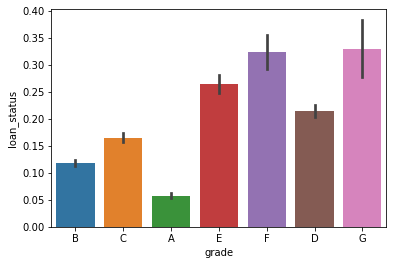

In [50]:
sns.barplot(loan['grade'],loan['loan_status'])
plt.show()

####

In [51]:
def grouped(f):
    return loan.groupby(f)["loan_status"].value_counts().unstack().fillna(0).reset_index()

In [52]:
grouped('term')

loan_status,term,0,1
0,36,24595,2894
1,60,6929,2307


#### Loan amount to loan status

(array([4565., 9245., 7621., 4756., 3844., 2876., 1125., 1572.,  431.,
         690.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <BarContainer object of 10 artists>)

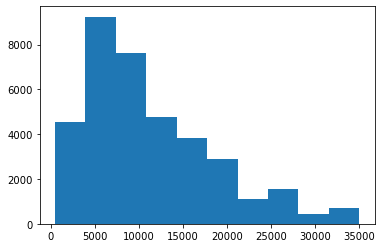

In [53]:
plt.hist(loan['loan_amnt'])

(array([4590., 9228., 8377., 4865., 3956., 2513., 1280.,  976.,  410.,
         530.]),
 array([    0.,  3500.,  7000., 10500., 14000., 17500., 21000., 24500.,
        28000., 31500., 35000.]),
 <BarContainer object of 10 artists>)

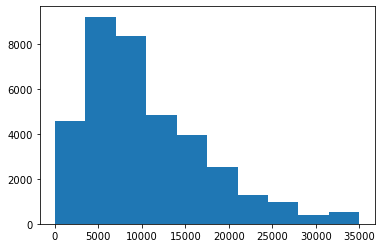

In [54]:
plt.hist(loan['funded_amnt_inv'])

#### Univariate Analysis

In [55]:
loan['loan_status'].value_counts()

0    31524
1     5201
Name: loan_status, dtype: int64

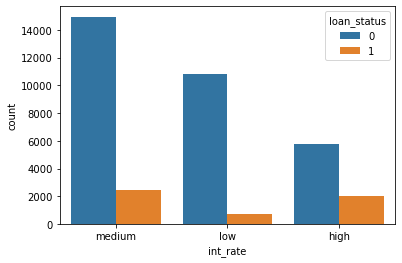

In [56]:
sns.countplot(x='int_rate',hue='loan_status',order = loan['int_rate'].value_counts().index,data=loan)
plt.show()

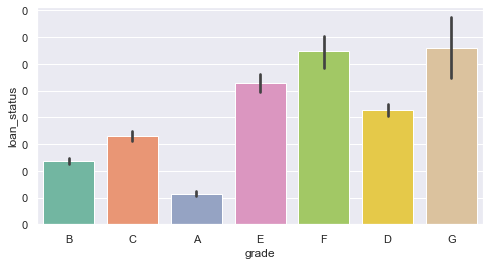

In [57]:
sns.set(font_scale=1)
plt.figure(figsize=(8, 4))
ax1 = sns.barplot(x='grade', y='loan_status', data=loan,  palette="Set2")
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc:format(int(x))))
plt.show()

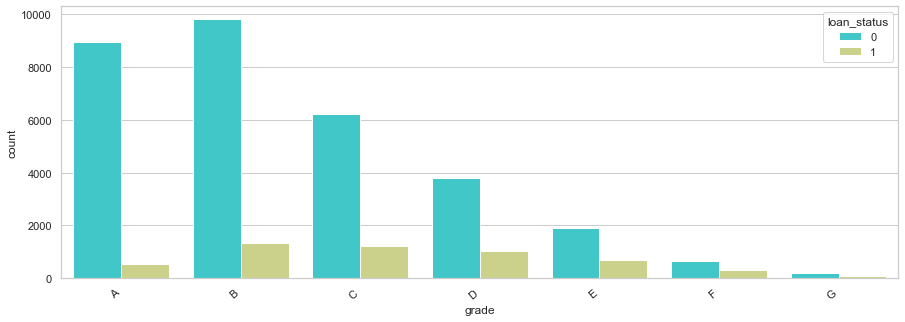

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
ax=sns.countplot(x='grade',hue='loan_status',order=sorted(loan.grade.unique()),data=loan,palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

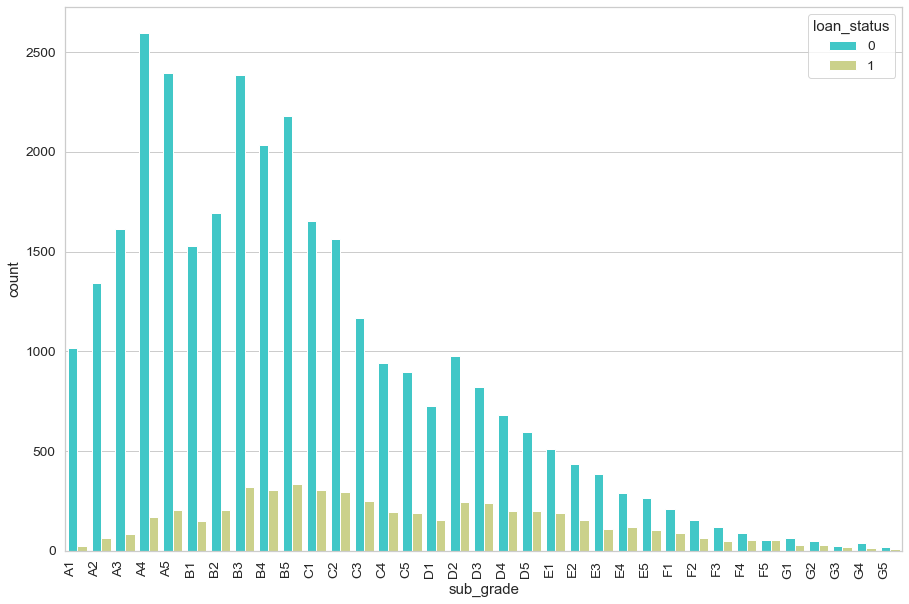

In [59]:
sns.set(font_scale=1.25)
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
ax=sns.countplot(x='sub_grade',hue='loan_status',data=loan,order=sorted(loan.sub_grade.unique()),palette='rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


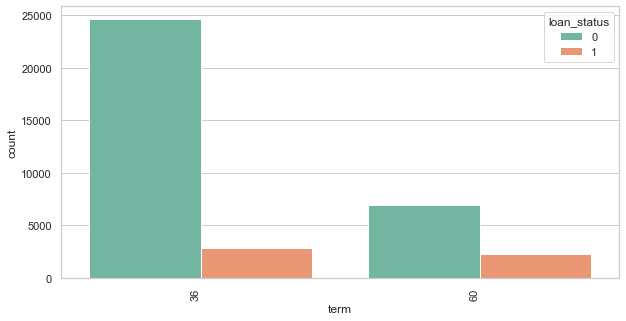

In [60]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
ax=sns.countplot(x='term',hue='loan_status',order=sorted(loan.term.unique()),data=loan,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


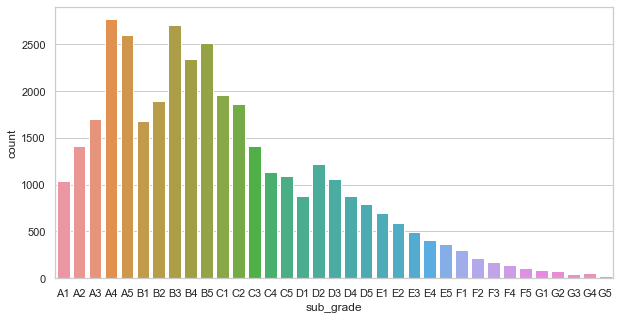

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(loan['sub_grade'], order=sorted(loan.sub_grade.unique()))
plt.show()

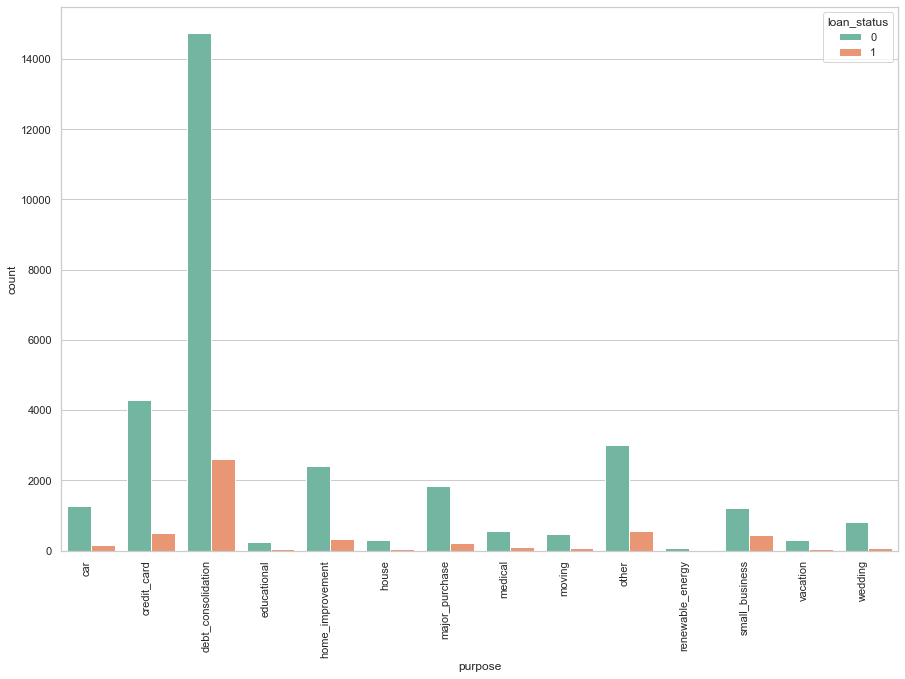

In [62]:
sns.set(font_scale=1.0)
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
ax=sns.countplot(x='purpose',hue='loan_status',order=sorted(loan.purpose.unique()),data=loan,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

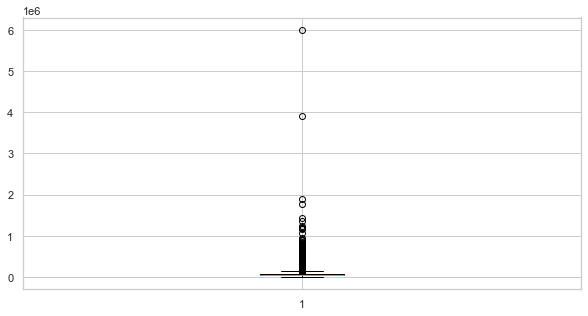

In [67]:
plt.figure(figsize=(10, 5))
plt.boxplot(loan['annual_inc'])
plt.show()

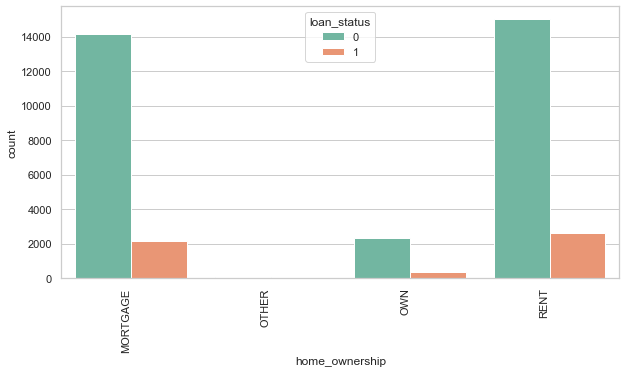

In [70]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
ax=sns.countplot(x='home_ownership',hue='loan_status',order=sorted(loan.home_ownership.unique()),data=loan,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

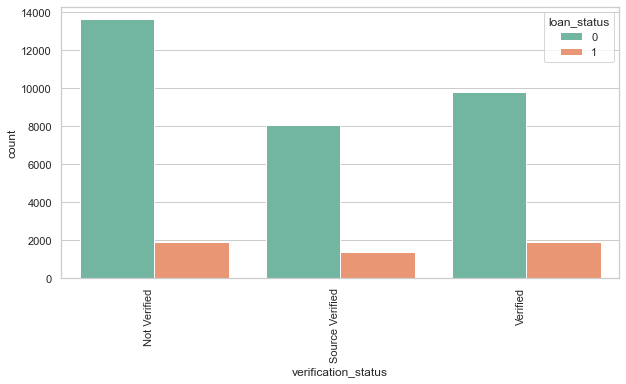

In [71]:
sns.set(font_scale=1.0)
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
ax=sns.countplot(x='verification_status',hue='loan_status',order=sorted(loan.verification_status.unique()),data=loan,palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

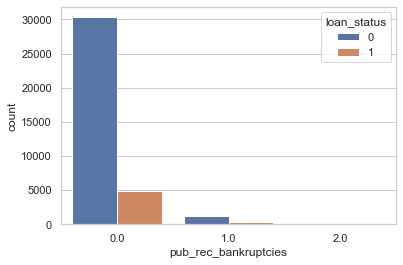

In [75]:
sns.countplot(x='pub_rec_bankruptcies',hue='loan_status',data=loan)

In [ ]:
df = loan[np.abs(loan.annual_inc-loan.annual_inc.mean()) <= (3*loan.annual_inc.std())]'


#### Multivariate Analysis

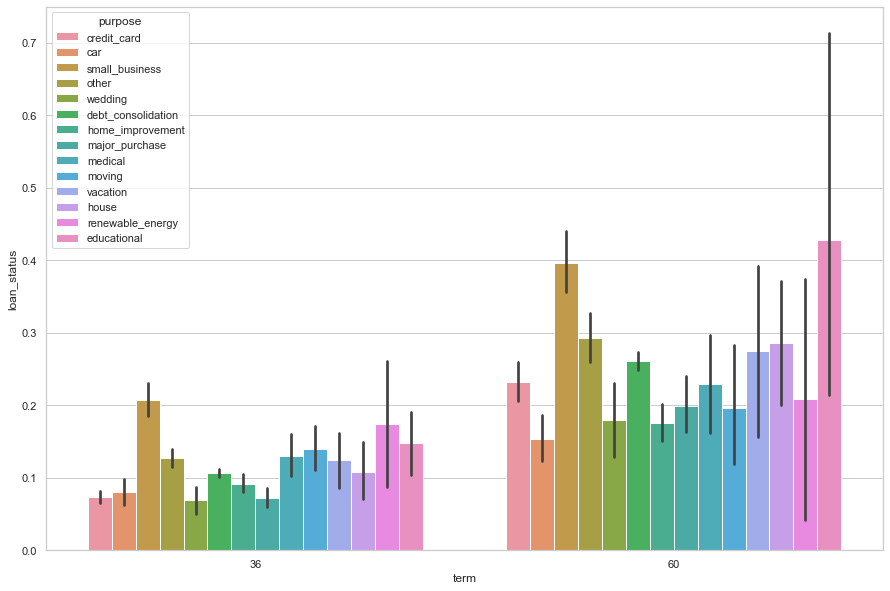

In [77]:
plt.figure(figsize=[15, 10])
sns.barplot(x='term', y="loan_status", hue='purpose', data=loan)
plt.show()

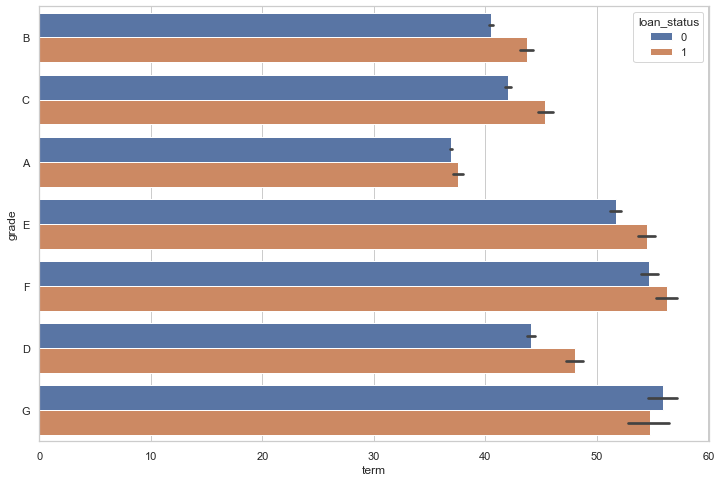

In [88]:
plt.figure(figsize=[12, 8])
sns.barplot(x='term', y="grade", hue='loan_status', data=loan)
plt.show()